<p><font size="6"><b>05 - Pandas: "Group by" operations</b></font></p>


> *© 2024, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Some 'theory': the groupby operation (split-apply-combine)

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [3]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [4]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="../img/pandas/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [5]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


In [6]:
df.groupby('key').aggregate("sum")

,data
key,
A,15
B,30
C,45


And many more methods are available.

In [7]:
df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

# Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [8]:
df = pd.read_csv("data/titanic.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Using groupby(), calculate the average age for each sex.</li>
</ul>
</div>

In [10]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [11]:
# df['Survived'].sum() / len(df['Survived'])
df['Survived'].mean()

0.3838383838383838

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger than 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [12]:
df25 = df[df['Age'] < 25]
df25['Survived'].mean()

0.4244604316546763

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [13]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot of the survival ratio for the different classes ('Pclass' column).</li>
</ul>
</div>

<Axes: xlabel='Pclass'>

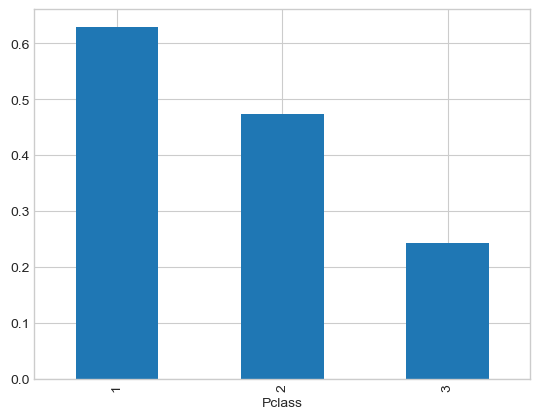

In [14]:
df.groupby('Pclass')['Survived'].mean().plot.bar() #and what if you would compare the total number of survivors?

<div class="alert alert-success">

**EXERCISE**:

* Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is divided in separate classes using the `pd.cut()` function as provided below.

</div>

In [15]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

<Axes: xlabel='AgeClass'>

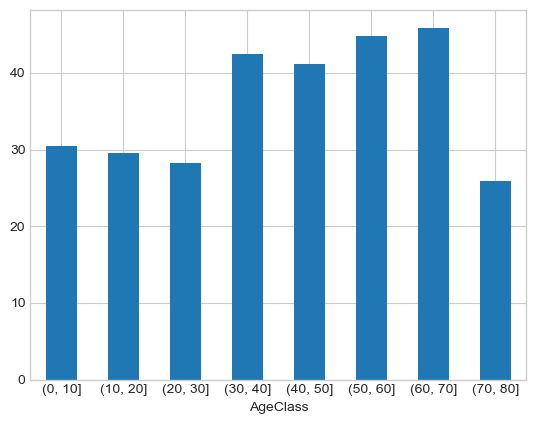

In [16]:
df.groupby('AgeClass', observed=False)['Fare'].mean().plot.bar(rot=0)

If you are ready, more groupby exercises can be found below.

# Some more theory

## Specifying the grouper

In the previous example and exercises, we always grouped by a single column by passing its name. But, a column name is not the only value you can pass as the grouper in `df.groupby(grouper)`. Other possibilities for `grouper` are:

- a list of strings (to group by multiple columns)
- a Series (similar to a string indicating a column in df) or array
- function (to be applied on the index)
- levels=[], names of levels in a MultiIndex

In [17]:
df.groupby(df['Age'] < 18)['Survived'].mean()

Age
False    0.361183
True     0.539823
Name: Survived, dtype: float64

In [18]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

## The size of groups - value counts

Often you want to know how many elements there are in a certain group (or in other words: the number of occurences of the different values from a column).

To get the size of the groups, we can use `size`:

In [19]:
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [20]:
df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

Another way to obtain such counts, is to use the Series `value_counts` method (which additionally sorts from most to least occurring group):

In [21]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# [OPTIONAL] Additional exercises using the movie data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so credit to him!) and the datasets he prepared for that. You can download these data from here: [titles.csv](https://course-python-data.s3.eu-central-1.amazonaws.com/titles.csv) and [cast.csv](https://course-python-data.s3.eu-central-1.amazonaws.com/cast.csv) and put them in the `/notebooks/data` folder.

`cast` dataset: different roles played by actors/actresses in films

- title: title of the movie
- year: year it was released
- name: name of the actor/actress
- type: actor/actress
- n: the order of the role (n=1: leading role)

In [22]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


`titles` dataset:

* title: title of the movie
* year: year of release

In [23]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">

**EXERCISE**:


* Using `groupby()`, plot the number of films that have been released each decade in the history of cinema.

</div>

In [24]:
titles['decade'] = titles['year'] // 10 * 10

<Axes: xlabel='decade'>

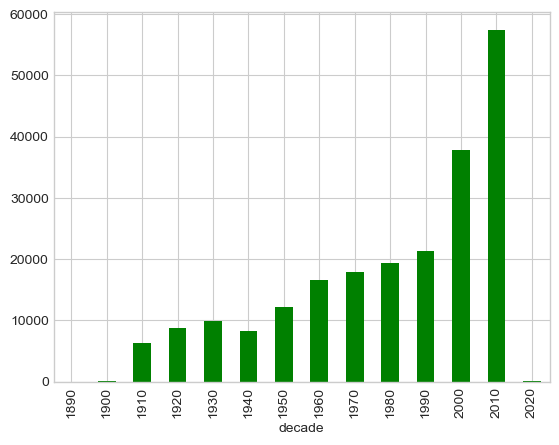

In [25]:
titles.groupby('decade').size().plot.bar(color='green')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Use `groupby()` to plot the number of 'Hamlet' movies made each decade.</li>
</ul>
</div>

<Axes: xlabel='decade'>

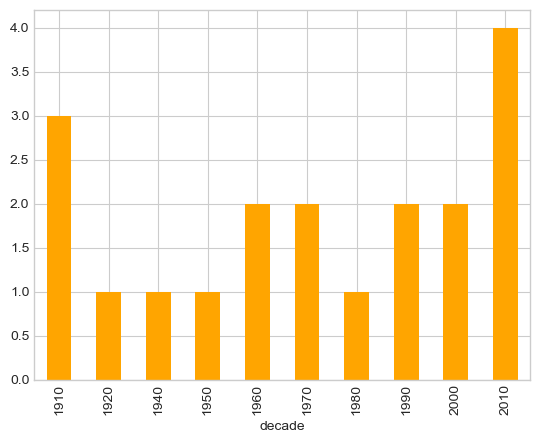

In [26]:
titles['decade'] = titles['year'] // 10 * 10
hamlet = titles[titles['title'] == 'Hamlet']
hamlet.groupby('decade').size().plot.bar(color="orange")

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>For each decade, plot all movies of which the title contains "Hamlet".</li>
</ul>
</div>

<Axes: xlabel='decade'>

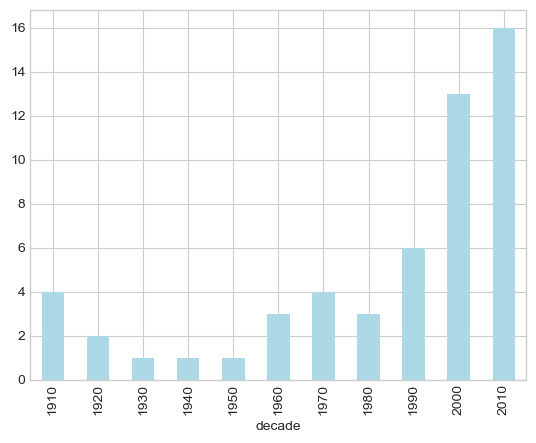

In [27]:
titles['decade'] = titles['year'] // 10 * 10
hamlet = titles[titles['title'].str.contains('Hamlet')]
hamlet.groupby('decade').size().plot.bar(color="lightblue")

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.</li>
</ul>
</div>

In [28]:
cast1990 = cast[cast['year'] >= 1990]
cast1990 = cast1990[cast1990['n'] == 1]
cast1990.groupby('name').size().nlargest(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Amitabh Bachchan       68
Eric Roberts           68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

In [29]:
cast1990['name'].value_counts().head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
Name: count, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>In a previous exercise, the number of 'Hamlet' films released each decade was checked. Not all titles are exactly called 'Hamlet'. Give an overview of the titles that contain 'Hamlet' and an overview of the titles that start with 'Hamlet',  each time providing the amount of occurrences in the data set for each of the movies</li>
</ul>
</div>

In [30]:
hamlets = titles[titles['title'].str.contains('Hamlet')]
hamlets['title'].value_counts()

title
Hamlet                                     19
Hamlet (II)                                 5
Han, hun og Hamlet                          2
Hamlet (III)                                2
National Theatre Live: Hamlet               1
Hamlet 2                                    1
Predstava 'Hamleta' u Mrdusi Donjoj         1
Kadin Hamlet                                1
Hamlet liikemaailmassa                      1
Dogg's Hamlet, Cahoot's Macbeth             1
Hamlet X                                    1
Fuck Hamlet                                 1
Zombie Hamlet                               1
Hamlet the Vampire Slayer                   1
H for Hamlet                                1
Kitchen Hamlet                              1
Harry, Hamlet and I                         1
The Tragedy of Hamlet Prince of Denmark     1
A Sagebrush Hamlet                          1
Hamlet's Ghost                              1
Hamlet A.D.D.                               1
Hamlet, Son of a Kingpin    

In [31]:
hamlets = titles[titles['title'].str.startswith('Hamlet')]
hamlets['title'].value_counts()

title
Hamlet                           19
Hamlet (II)                       5
Hamlet (III)                      2
Hamlet the Vampire Slayer         1
Hamlet liikemaailmassa            1
Hamlet 2                          1
Hamlet X                          1
Hamlet's Ghost                    1
Hamlet A.D.D.                     1
Hamlet, Son of a Kingpin          1
Hamlet: Prince of Denmark         1
Hamlet_X                          1
Hamlet: The Fall of a Sparrow     1
Hamlet, Prince of Denmark         1
Hamlet Unbound                    1
Hamlet (A Modern Adaptation)      1
Hamlet in the Hamptons            1
Name: count, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>List the 10 movie titles with the longest name.</li>
</ul>
</div>

In [32]:
title_longest = titles['title'].str.len().nlargest(10)
title_longest

127048    208
28483     196
103597    116
8396      114
85693     104
108020    104
206303    101
122757     99
52929      94
187654     92
Name: title, dtype: int64

In [33]:
pd.options.display.max_colwidth = 210
titles.loc[title_longest.index]

,title,year,decade
127048,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil Mutant Hellbound Flesh Eating Crawling Alien Zombified Subhumanoid Living Dead, Part 5",2011,2010
28483,"Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3",2005,2000
103597,Maverick and Ariel's First Ever Ever Movie Hollywood or Else... (Ang pinakamahabang title ng movie sa balat ng lupa),2010,2010
8396,The Fable of the Kid Who Shifted His Ideals to Golf and Finally Became a Baseball Fan and Took the Only Known Cure,1916,1910
85693,"Film d'amore e d'anarchia, ovvero 'stamattina alle 10 in via dei Fiori nella nota casa di tolleranza...'",1973,1970
108020,Those Magnificent Men in Their Flying Machines or How I Flew from London to Paris in 25 hours 11 minutes,1965,1960
206303,Ontologica! or a Brief Explanation of Absolutely Everything that is Known about Absolutely Everything,2012,2010
122757,The Official Motion Pictures of the Heavyweight Boxing Contest Between Gene Tunney and Jack Dempsey,1927,1920
52929,Something Strange: 23 Peculiar Perspectives of Metaphysical Phenomena in a Modern American Age,2012,2010
187654,"The Personal History, Adventures, Experience, & Observation of David Copperfield the Younger",1935,1930


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?</li>
</ul>
</div>

In [34]:
cast1950 = cast[cast['year'] // 10 == 195]
cast1950 = cast1950[cast1950['n'] == 1]
cast1950.groupby(['year', 'type']).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the 11 most common character names in movie history?</li>
</ul>
</div>

In [35]:
cast.character.value_counts().head(11)

character
Himself        18928
Dancer         11070
Extra           9141
Reporter        7646
Doctor          6846
Policeman       6501
Student         6406
Bartender       6178
Nurse           6164
Party Guest     5917
Minor Role      5880
Name: count, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot how many roles Brad Pitt has played in each year of his career.</li>
</ul>
</div>

<Axes: xlabel='year'>

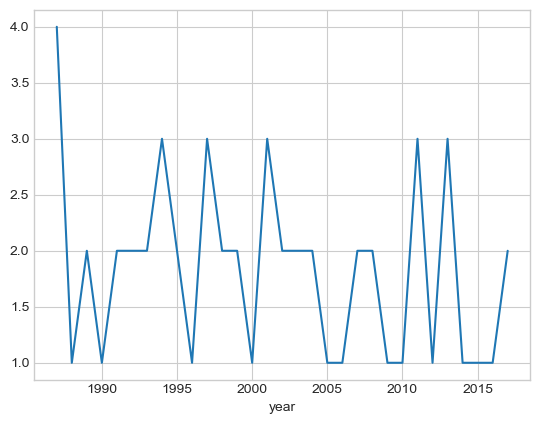

In [36]:
cast[cast.name == 'Brad Pitt'].year.value_counts().sort_index().plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What are the 10 most occurring movie titles that start with the words 'The Life'?</li>
</ul>
</div>

In [37]:
titles[titles['title'].str.startswith('The Life')]['title'].value_counts().head(10)

title
The Life of Riley                       3
The Life of the Party                   3
The Life Coach                          2
The Life and the Agony                  1
The Life and Legend of Buffalo Jones    1
The Lifeguardsman                       1
The Life of Luxury                      1
The Life and Death of Colonel Blimp     1
The Life and Times of Jacob Flynn       1
The Life of St. Patrick                 1
Name: count, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Which actors or actresses were most active in the year 2010 (i.e. appeared in the most movies)?</li>
</ul>
</div>

In [38]:
cast[cast.year == 2010].name.value_counts().head(10)

name
Lloyd Kaufman           23
Suraaj Venjarammoodu    20
Chris (II) Eddy         20
Jagathi Sreekumar       20
Matt Simpson Siegel     17
Danny Trejo             17
Ben (II) Bishop         15
Kyle Rea                15
Joe Estevez             15
Brahmanandam            15
Name: count, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Determine how many roles are listed for each of 'The Pink Panther' movies.</li>
</ul>
</div>

In [39]:
pink = cast[cast['title'] == 'The Pink Panther']
pink.groupby(['year'])[['n']].max()

,n
year,
1963,15.0
2006,50.0


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> List, in order by year, each of the movies in which 'Frank Oz' has played more than 1 role.</li>
</ul>
</div>

In [40]:
oz = cast[cast['name'] == 'Frank Oz']
oz_roles = oz.groupby(['year', 'title']).size()
oz_roles[oz_roles > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> List each of the characters that Frank Oz has portrayed at least twice.</li>
</ul>
</div>

In [41]:
oz = cast[cast['name'] == 'Frank Oz']
oz_roles = oz.groupby(['character']).size()
oz_roles[oz_roles > 1].sort_values()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64

<div class="alert alert-success">

**EXERCISE**

Add a new column to the `cast` DataFrame that indicates the number of roles for each movie. 
    
<details><summary>Hints</summary>

- [Transformation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation) returns an object that is indexed the same (same size) as the one being grouped.

</details>  
    

</div>

In [42]:
cast['n_total'] = cast.groupby(['title', 'year'])['n'].transform('size') # transform will return an element for each row, so the size value is given to the whole group
cast.head()

,title,year,name,type,character,n,n_total
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0,24
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN,24
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0,47
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0,34
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN,34


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> Calculate the ratio of leading actor and actress roles to the total number of leading roles per decade. </li>
</ul><br>

**Tip**: you can do a groupby twice in two steps, first calculating the numbers, and secondly, the ratios.
</div>

In [43]:
leading = cast[cast['n'] == 1]
sums_decade = leading.groupby([cast['year'] // 10 * 10, 'type']).size()
sums_decade

year  type   
1900  actor          5
      actress        1
1910  actor       2406
      actress     2753
1920  actor       4485
      actress     3014
1930  actor       6108
      actress     2826
1940  actor       5221
      actress     2143
1950  actor       6388
      actress     2813
1960  actor       7678
      actress     3112
1970  actor       8236
      actress     3320
1980  actor       9023
      actress     3274
1990  actor      10455
      actress     3972
2000  actor      17972
      actress     7537
2010  actor      17262
      actress     7384
2020  actor          3
      actress        1
dtype: int64

In [44]:
#sums_decade.groupby(level='year').transform(lambda x: x / x.sum())
ratios_decade = sums_decade / sums_decade.groupby(level='year').transform('sum')
ratios_decade

year  type   
1900  actor      0.833333
      actress    0.166667
1910  actor      0.466369
      actress    0.533631
1920  actor      0.598080
      actress    0.401920
1930  actor      0.683680
      actress    0.316320
1940  actor      0.708990
      actress    0.291010
1950  actor      0.694272
      actress    0.305728
1960  actor      0.711585
      actress    0.288415
1970  actor      0.712703
      actress    0.287297
1980  actor      0.733756
      actress    0.266244
1990  actor      0.724683
      actress    0.275317
2000  actor      0.704536
      actress    0.295464
2010  actor      0.700398
      actress    0.299602
2020  actor      0.750000
      actress    0.250000
dtype: float64

<Axes: xlabel='year'>

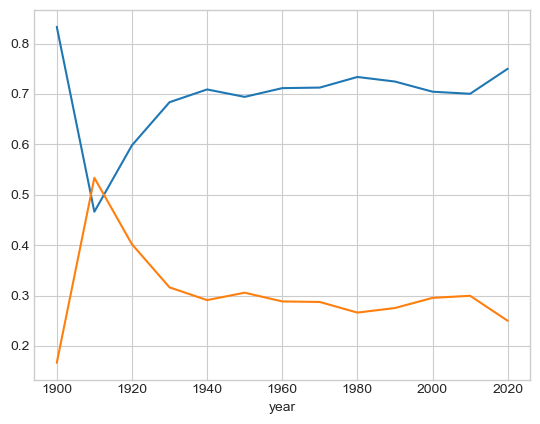

In [45]:
ratios_decade[:, 'actor'].plot()
ratios_decade[:, 'actress'].plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li> In which years the most films were released?</li>
</ul><br>
</div>

In [46]:
t = titles
t.year.value_counts().head(3)

year
2015    13978
2014     8209
2013     7664
Name: count, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s? And in 2000s?</li>
</ul><br>
</div>

In [47]:
cast1950 = cast[cast['year'] // 10 == 195]
cast1950 = cast1950[cast1950['n'] == 1]
cast1950['type'].value_counts()

type
actor      6388
actress    2813
Name: count, dtype: int64

In [48]:
cast2000 = cast[cast['year'] // 10 == 200]
cast2000 = cast2000[cast2000['n'] == 1]
cast2000['type'].value_counts()

type
actor      17972
actress     7537
Name: count, dtype: int64